In [2]:
import pandas as pd
import numpy as np
from datetime import datetime
from scipy import stats
import matplotlib.pyplot as plt

### 1. Loi de l'heure de premier depart

In [20]:
data = pd.read_csv('/home/onyxia/Projet_statapp/data/EMP_deplacements_Charme.csv', delimiter=';', decimal=',', encoding = "ISO-8859-1")
premiers_departs = data[data.num_dep_V == 1]
premiers_departs = premiers_departs.HEURE_DEPART
premiers_departs = premiers_departs.reset_index(drop=True)

In [22]:
from scipy.stats import lognorm
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error
import numpy as np

evolution_ecart_type_test_error = []

for l in range(2,101) : 

    train_errors = []
    test_errors = []
    parameters_list = []

    kf = KFold(n_splits=l, shuffle=True)

    # Parcourez chaque fold
    for train_index, test_index in kf.split(premiers_departs):

        # Divisez les données en ensembles d'entraînement et de test
        train_data, test_data = premiers_departs.iloc[train_index], premiers_departs.iloc[test_index]
        
        # Ajustez la loi lognormale sur les données d'entraînement
        params = lognorm.fit(train_data)
        parameters_list.append(params)
        
        # Calculez les prédictions sur les données d'entraînement
        train_predictions = lognorm.rvs(*params, size=len(train_data))
        
        # Calculez les prédictions sur les données de test
        test_predictions = lognorm.rvs(*params, size=len(test_data))
        
        # Calculez l'erreur de train
        train_error = np.sqrt(mean_squared_error(train_data, train_predictions))
        train_errors.append(train_error)
        
        # Calculez l'erreur de test
        test_error = np.sqrt(mean_squared_error(test_data, test_predictions))
        test_errors.append(test_error)

    evolution_ecart_type_test_error.append(np.std(test_errors))


Text(0.5, 1.0, 'Ecart-type des erreurs de tests pour chaque k sous ensembles')

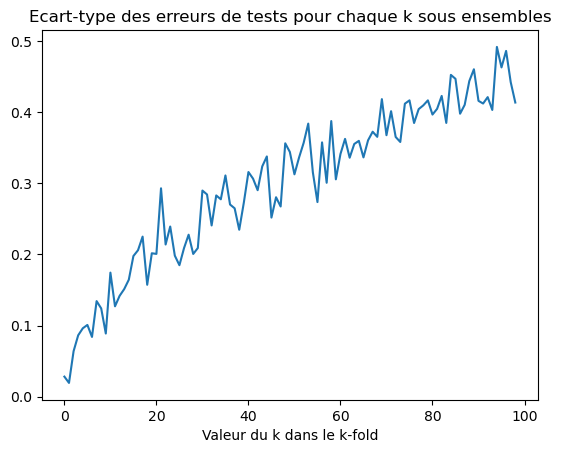

In [26]:
plt.plot(evolution_ecart_type_test_error)
plt.xlabel('Valeur du k dans le k-fold')
plt.title('Ecart-type des erreurs de tests pour chaque k sous ensembles')

Plus l'ensemble de données est grand, plus le modèle est robuste (ne depend pas de l'échantillon précis).
On voit qu'avec l'ensemble / 2 on est en dessous de 0.1 donc ok.

Comprendre que quand on prend k = 2, nos erreurs de tests sont très proches ie performances equivalentes.

Quand on prend k = 50, plus grand écart type dans les erreurs de tests. ie le modele est moins robuste.

### 2. Loi du temps de trajet


Test de la robustesse de la loi de modélisation choisie par rapport aux particularités de l'échantillon utilisé.
On compare donc les paramètres obtenus en fittant une loi log normale sur differents sous ensemble (assez normal quils soient similaires car les sous ensembles k ont beaucoup de données en commun a chaque fois)
Puis on compare les différentes erreurs de tests. Cette fois si les 5 ensembles sont tout a fait differents.

In [31]:
data = pd.read_csv('/home/onyxia/Projet_statapp/data/EMP_deplacements_Charme.csv', sep=';', encoding='ISO-8859-1', decimal=',')
data['DUREE_TRAJET'] = data['HEURE_ARRIVEE'] - data['HEURE_DEPART']
data['DUREE_TRAJET'] = data['DUREE_TRAJET'].apply(lambda x: x if x >= 0 else (23 + (59/60)) - data['HEURE_DEPART'])
duree_trajet = data['DUREE_TRAJET']

In [32]:
duree_trajet

0        0.083333
1        0.083333
2        1.000000
3        0.500000
4        0.250000
           ...   
22521    0.083333
22522    0.083333
22523    1.000000
22524    0.750000
22525    0.750000
Name: DUREE_TRAJET, Length: 22526, dtype: float64

In [38]:
from scipy.stats import lognorm
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error
import numpy as np

train_errors = []
test_errors = []
parameters_list = []

kf = KFold(n_splits=5, shuffle=True)

# Parcourez chaque fold
for train_index, test_index in kf.split(duree_trajet):

    # Divisez les données en ensembles d'entraînement et de test
    train_data, test_data = duree_trajet.iloc[train_index], duree_trajet.iloc[test_index]
    
    # Ajustez la loi lognormale sur les données d'entraînement
    params = lognorm.fit(train_data)
    parameters_list.append(params)
    
    # Calculez les prédictions sur les données d'entraînement
    train_predictions = lognorm.rvs(*params, size=len(train_data))
    
    # Calculez les prédictions sur les données de test
    test_predictions = lognorm.rvs(*params, size=len(test_data))
    
    # Calculez l'erreur de train
    train_error = np.sqrt(mean_squared_error(train_data, train_predictions))
    train_errors.append(train_error)
    
    # Calculez l'erreur de test
    test_error = np.sqrt(mean_squared_error(test_data, test_predictions))
    test_errors.append(test_error)


/opt/mamba/lib/python3.11/site-packages/scipy/stats/_continuous_distns.py:6556: RuntimeWarning: overflow encountered in divide
  return np.sum((1 + np.log(shifted/scale)/shape**2)/shifted)
/opt/mamba/lib/python3.11/site-packages/scipy/stats/_continuous_distns.py:6556: RuntimeWarning: overflow encountered in divide
  return np.sum((1 + np.log(shifted/scale)/shape**2)/shifted)
/opt/mamba/lib/python3.11/site-packages/scipy/stats/_continuous_distns.py:6556: RuntimeWarning: overflow encountered in divide
  return np.sum((1 + np.log(shifted/scale)/shape**2)/shifted)
/opt/mamba/lib/python3.11/site-packages/scipy/stats/_continuous_distns.py:6556: RuntimeWarning: overflow encountered in divide
  return np.sum((1 + np.log(shifted/scale)/shape**2)/shifted)


In [39]:
parameters_list

[(0.7775151092791972, -0.005130611751587492, 0.23585223237272263),
 (0.7696860371465436, -0.00778247826647273, 0.2390803200208944),
 (0.7676204173079916, -0.007720149140924001, 0.23843416629468248),
 (0.7710828507360202, -0.0075613251746082894, 0.23815492935167257),
 (0.7735468398298044, -0.006986000783588582, 0.23857130455390582)]

Moyenne des paramètres:
Scale: 0.7714194618108181
Loc: -0.007147055070529923
Shape: 0.23817071937125486
Écart-type des paramètres:
Scale: 0.0015710034183855032
Loc: 0.0003707317854052462
Shape: 0.000829436192431734


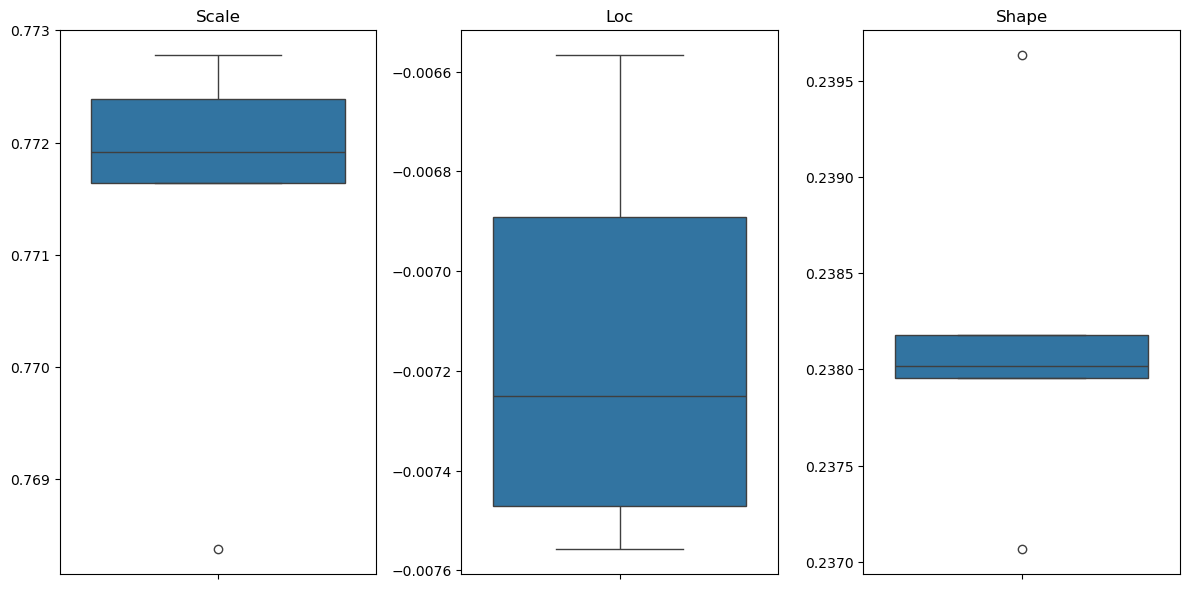

In [36]:
import seaborn as sns

# Extraction des paramètres
scales, locs, shapes = zip(*parameters_list)

# Calcul des moyennes et écarts types
mean_scale = np.mean(scales)
std_scale = np.std(scales)
mean_loc = np.mean(locs)
std_loc = np.std(locs)
mean_shape = np.mean(shapes)
std_shape = np.std(shapes)

print("Moyenne des paramètres:")
print("Scale:", mean_scale)
print("Loc:", mean_loc)
print("Shape:", mean_shape)

print("Écart-type des paramètres:")
print("Scale:", std_scale)
print("Loc:", std_loc)
print("Shape:", std_shape)

# Boxplots des paramètres
plt.figure(figsize=(12, 6))

plt.subplot(1, 3, 1)
sns.boxplot(data=scales)
plt.title("Scale")

plt.subplot(1, 3, 2)
sns.boxplot(data=locs)
plt.title("Loc")

plt.subplot(1, 3, 3)
sns.boxplot(data=shapes)
plt.title("Shape")

plt.tight_layout()
plt.show()

ecart type : 0.009168455574547546


{'whiskers': [<matplotlib.lines.Line2D at 0x7f61fa309e10>,
 'caps': [<matplotlib.lines.Line2D at 0x7f61f9ff3f50>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f61f9f8f390>],
 'medians': [<matplotlib.lines.Line2D at 0x7f61f9ffd150>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f61f9ffd8d0>],
 'means': []}

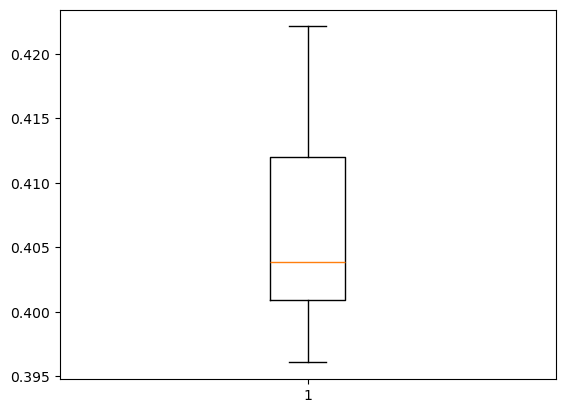

In [40]:
# Maintenant, on s'interesse aux 5 erreurs de test 

print(f'ecart type : {np.std(test_errors)}')

plt.boxplot(test_errors)

L'écart type des erreurs de test est très faible. On peut en déduire une certaine robustesse du modèle dont la performance est stable sur les 5 sous ensembles de test. 

